# Laborator 03.

Optimizarea bazată pe gradient presupune că putem calcula prima (sau chiar a doua) derivată a funcției obiectiv. Sunt multe cazuri în nu putem calcula gradientul funcției, deoarece nici măcar nu cunoaștem sau dispunem de formularea analitică a funcției. În acestă scenariu de ["cutie neagră"](https://www.lix.polytechnique.fr/~dambrosio/blackbox_material/Cassioli_1.pdf) dispunem doar de o modalitate de a crea sau modifica intrările $x_1 \dots x_d$ pentru funcția necunoscută, și de a observa rezultatul $y$ și "calitatea" acestuia, descris de o [funcție obiectiv](https://en.wikipedia.org/wiki/Loss_function) (denumit și fitness, funcție cost, energie etc.) $objFunc(y)$.

![](https://www.researchgate.net/profile/Nacim_Belkhir/publication/322035981/figure/fig1/AS:574906124910592@1514079709331/black-box-Optimization.png)

Fig. 1. Optimizare black-box.

# Căutare locală, metode traiectorie

[Căutare locală](https://en.wikipedia.org/wiki/Local_search_(optimization)) are ca scop găsirea soluției optime (ce minimizează sau maximizează funcția obiectiv) în [vecinătatea](https://en.wikipedia.org/wiki/Neighbourhood_(mathematics)) unei soluții inițiale $x$.

Algoritmii de căutare locală se deplasează de la soluție la soluție în spațiul soluțiilor posibile (spațiul de căutare) prin aplicarea repetată a unor perturbări, modificări locale. Astfel, pe parcursul rulării, acești algoritmi descriu o "traiectorie" în spațiul de căutare. 

## Random Search

Aceste [metode](https://en.wikipedia.org/wiki/Random_search) generează aleatoriu soluții din spațiul de căutare, și returnează aceea care obține evaluarea cea mai bună (conform fucției obiectiv). 

```
t = 0;
result = createNewSolution();
evaluate(result);
while notFinished(t) do
    a = createNewSolution();
    evaluate(a);
    if a isBetterThan result then
      result = a;
    t = t+1;
end_while
```

## Hill Climbing
Este o familie de metode iterative ce realizează o căutare locală,
denumită și Îmbunătățire iterativă ([Iterative Improvement](https://www.ocf.berkeley.edu/~shidi/cs61a/wiki/Iterative_improvement#:~:text=Iterative%20improvement%20is%20a%20technique,%3D%20update(guess)%20return%20guess)). Metoda printr-un operator de perturbație, modificare aleatorie actualizează-îmunătățește o soluție inițială, până când ajungem la soluția optimă (sau bugetul de timp alocat calculului, numărul maxim de încercări prestabilite este depășit).

```
t = 0;
result = createNewSolution();
evaluate(result);
while notFinished(t) do
    a = clone(result);
    mutate(a);
    evaluate(a);
    if a isBetterThan result then
      result = a;
   t = t+1;
end_while
```


Deseori se utilizează varianta iterată (Iterated Hill Climbing), în care algoritmul este repornit cu o soluție inițială nouă, pentru a mări gradul de explorare a spațiului de căutare.

# Exerciții

Vom încerca să ghicim o parolă (secvență de caractere presupus necunoscută) cu aceste metode.

In [ ]:
import random
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [ ]:
random.seed(2001)

In [ ]:
alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789'
target = 'mib2021'
target_length = len(target)

Avem nevoie de o metodă care să genereze aleatoriu dint-un alfabet, un șir de caractere de lungine specificată.

In [ ]:
def generateRandomSolution(length, alphabet):
    sol = random.choices(alphabet, k = length)
    return ''.join(sol)

Testarea funcției.

In [ ]:
# generate random solutions of increasing lengths
for i in range(2,10):
  print(generateRandomSolution(i, alphabet))

w6
3tm
r1j0
2m1c5
7qn3ln
fgdhyc8
hib26lcc
0mva5ya2p


Funcția obiectiv va specifica pentru o solțtie propusă, câte caractere se potrivesc, sunt la locul lor. 

In [ ]:
def objFuncNumMatches(guess): # objective function, also called, fitness, energy etc.
    return sum(1 for t, g in zip(target,guess) if t == g) # g = ce propunem , t- target  

Testarea funcției obiectiv.

In [ ]:
# generate random solutions and calculate their "fitness" (objective function value that we are maximizing)
for i in range(0,100):
  ind = generateRandomSolution(target_length, alphabet)
  fitness = objFuncNumMatches(ind)
  print('Solutia {0} are fitness-ul de: {1}'.format(ind, fitness))

## 1.
Generați 10000000 de soluții și calculați calitatea acestora. 

- Care este timpul de rulare?
- Care este distribuția valorilor de calitate? 
- Cât de des se potrivesc cel puțin 4 caractere?



### Răspuns
........

In [ ]:
# Pentru a vedea timpul de rulare
import datetime 

Elapsed time: 0:00:45.740065
[8.211027e+06 1.640655e+06 1.415220e+05 6.610000e+03 1.830000e+02
 3.000000e+00 0.000000e+00]


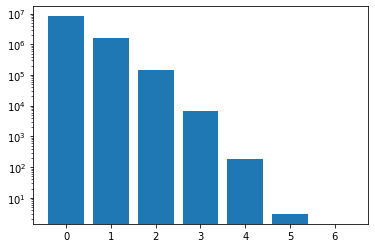

In [ ]:
hist = np.zeros(target_length)
startTime = datetime.datetime.now()

# TO DO generate and meassure solution's quality
for i in range(0, 10000000):
  ind = generateRandomSolution(target_length, alphabet)
  fitness = objFuncNumMatches(ind)
  hist[fitness] += 1
endTime = datetime.datetime.now()

print('Elapsed time: {0}'.format(str(endTime-startTime)))

print(hist)
plt.bar(range(0,target_length),hist)
plt.yscale('log')

## 2.
Implementați operatori de perturbație-modificare pentru o soluție în care:
- Se schimbă un caracter, îm mod aleatoriu.
- Caracterele sunt schimbate aleatoriu, cu o probabilitate specificată de utlizator.

In [ ]:
# functie care face o perturbatie , schimba un caracter
def randomSampleIndex(sol, index2Change):
  mutateSol = list(sol)
  mutateSol[index2Change] = random.sample(alphabet, 1)[0]
  return ''.join(mutateSol)

In [ ]:
# Pentru verificare metoda de mai sus 
ind = generateRandomSolution(target_length, alphabet)
fitness = objFuncNumMatches(ind)
mut = randomSampleIndex(ind, 0)
print(ind)
print(mut)

721gulp
j21gulp


In [ ]:
def mutateOneIndex(sol):
  index2Change = random.randrange(0, len(sol))
  return randomSampleIndex(sol,index2Change)

In [ ]:
# Pentru verificare metoda de mai sus 
ind = generateRandomSolution(target_length, alphabet)
mut = mutateOneIndex(ind)
print(ind)
print(mut)

qkw2rxf
qcw2rxf


In [ ]:
def mutateWithProb(sol, mutProb):
  for index2Change in range(0, len(sol)):
    if random.random() <= mutProb:
      sol = randomSampleIndex(sol, index2Change)
  return sol

In [ ]:
# Verificare solutie mutateWithProb
ind = generateRandomSolution(target_length, alphabet)
mut = mutateWithProb(ind, 0.1)

print(ind)
print(mut)

pkyqmx9
pkyqrx9


## 3.
 
Implementați metodele 'hillClimber' și 'hillClimberSteepestAcent' prezentate la curs. 

- Care metodă și cu ce parametrizare are cele mai bune rezultate (pentru această problemă)?
- Oare cum se explică diferența de performanță?
- Pentru ce tipuri de probleme, rezultatul ar fi inversat (metoda mai slabă pe această problemă, să aibă o perfomranță mai bună)?

### Răspuns
Metoda mai rapida este HillClimber , se executa mai rapid si cu mai putine iteratii
2. Diferenta se explica din punctul meu de vedere prin faptul ca trece prin fiecare caracter
3. Probabil prin gasirea drumului optim , intre 2 puncte in care ne intereseaza cel mai rapid drum(sau drumul cu costul cel mai mic)

In [ ]:
def hillClimber(maxIterations = 10000, mutProb = 0.15):
  result = generateRandomSolution(target_length, alphabet)
  f = objFuncNumMatches(result)

  for i in range(0, maxIterations):
    # perturbam rezultatul partial
    mut = mutateOneIndex(result)
    fmut = objFuncNumMatches(mut)

    if fmut > f:
      f = fmut
      result = mut

    if f >= target_length:
      break;
    
  return result, f, i

In [ ]:
startTime1 = datetime.datetime.now()
s, f, iter = hillClimber(10000)
endTime1 = datetime.datetime.now()
print('Elapsed time: {0}'.format(str(endTime1-startTime1)))
print(s)
print(f)
print(iter)

Elapsed time: 0:00:00.005332
mib2021
7
556


In [ ]:
def hillClimberSteepestAscent(maxIterations = 10000, mutProb = 0.05):
  result = generateRandomSolution(target_length, alphabet)
  f = objFuncNumMatches(result)
  
  for i in range(0, maxIterations):
    # Generam MAI MULTe alternative din vecinatatea solutiei actuale - result
    # Alegem alternativa cu cea mai mare imbunatatire adusa 
    # Daca depaseste calitatea solutiei actuale

    # 2 variabile pentru a calcula maximum local
    localResult = result
    localf = f
    for index2Change in range(0, target_length):
      mut = randomSampleIndex(result, index2Change)
      fmut = objFuncNumMatches(mut)
      if fmut > localf:
        localf = fmut
        localResult = mut

      if localf > f:
        f = localf
        result = localResult
      
      if f >= target_length:
        break;

    
  return result, f, i

In [ ]:
startTime = datetime.datetime.now()
s, f, iter = hillClimberSteepestAscent(10000, 0.15)
endTime = datetime.datetime.now()
print('Elapsed time: {0}'.format(str(endTime-startTime)))
print(s)
print(f)
print(iter)

Elapsed time: 0:00:00.067575
mib2021
7
9999
